# What is a Random Forest Algorithm?
- Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

# Random Forest
 
### About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
- **Sales** -- Unit sales (in thousands) at each location
- **Competitor Price** -- Price charged by competitor at each location
- **Income** -- Community income level (in thousands of dollars)
- **Advertising** -- Local advertising budget for company at each location (in thousands of dollars)
- **Population** -- Population size in region (in thousands)
- **Price** -- Price company charges for car seats at each site
- **Shelf Location at stores** -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- **Age** -- Average age of the local population
- **Education** -- Education level at each location
- **Urban** -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- **US** -- A factor with levels No and Yes to indicate whether the store is in the US or not
 
 
### Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

**Approach**
- A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [6]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from dataprep.eda import create_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score


import warnings
warnings.filterwarnings('ignore')


In [7]:
data= pd.read_csv('Company_Data.csv')
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [8]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


- As we can see in the table, 3 categorical column and 8 numerical column.
- No missing value present in dataset.

In [10]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
data.duplicated().sum()

0

No duplicates and missing values in data.

# Data Visualisation

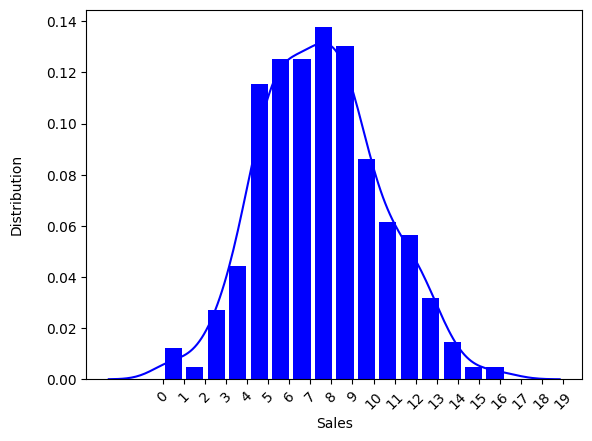

In [24]:
sn.distplot(df['Sales'], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
plt.xticks(np.arange(0,20,1),rotation=45,)
plt.ylabel('Distribution\n')
plt.show()


- As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

#### For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [27]:
df['Sales_cat']=df['Sales'].apply(lambda x:'Good' if x>=7.5 else 'Bad')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_cat  
0           17   Yes  Yes      Good  
1           10   Yes  Yes      Good  
2           12   Yes  Yes      Good  
3           14   Yes  Yes       Bad  
4           13   Yes   No       Bad  
..         ...   ...  ...       ...  
395         14   Yes  Yes      Good  
396         11    No  Yes       Bad  
397         18   Yes  Yes       Bad  
398         12   Yes  Yes       Bad  
399         16   Yes  Yes      Good  

[400 rows x 12 columns]

In [28]:
cat_features=df.describe(include=['object']).columns
cat_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

- This are the categorical features

In [29]:
num_features=df.describe(include=['int64','float64']).columns
num_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [33]:
for i in cat_features:
    unique=df[i].value_counts()
    print(unique)
    print(' ')

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
 
Yes    282
No     118
Name: Urban, dtype: int64
 
Yes    258
No     142
Name: US, dtype: int64
 
Bad     201
Good    199
Name: Sales_cat, dtype: int64
 


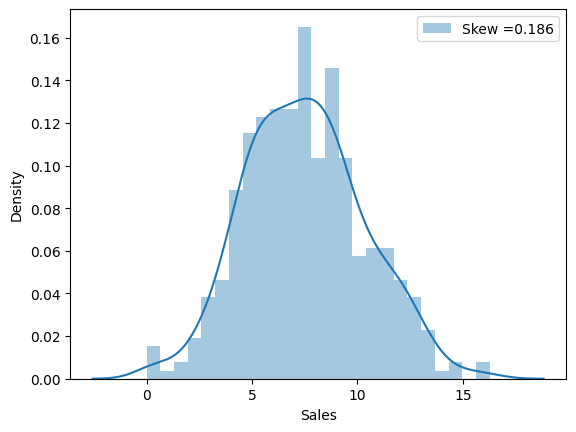

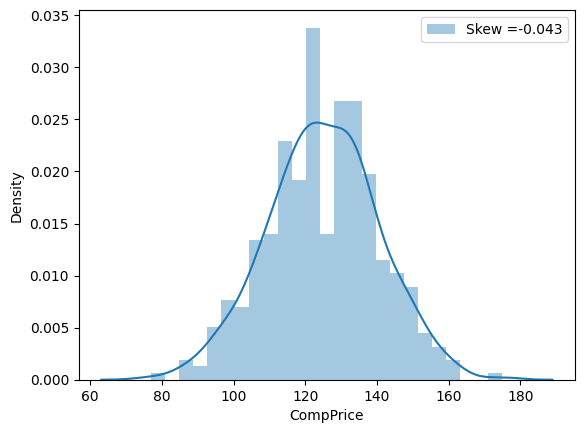

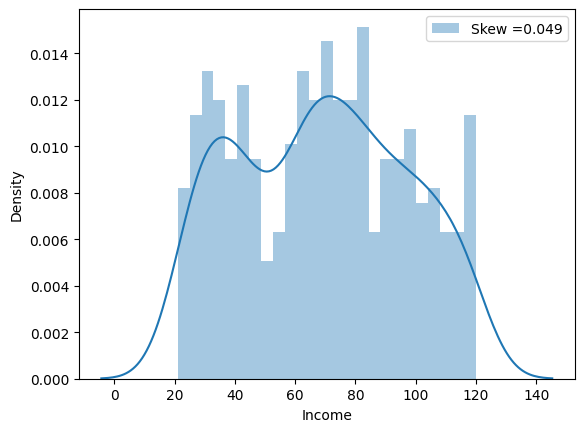

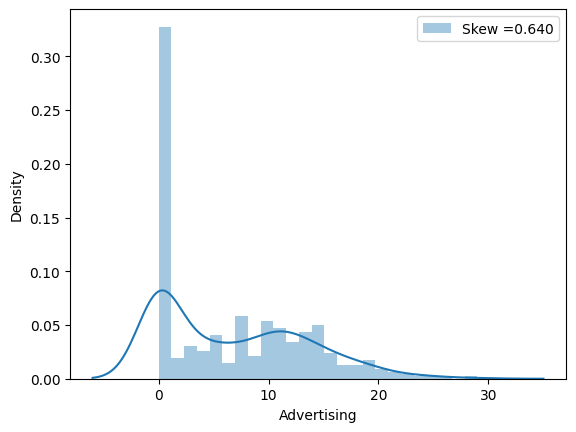

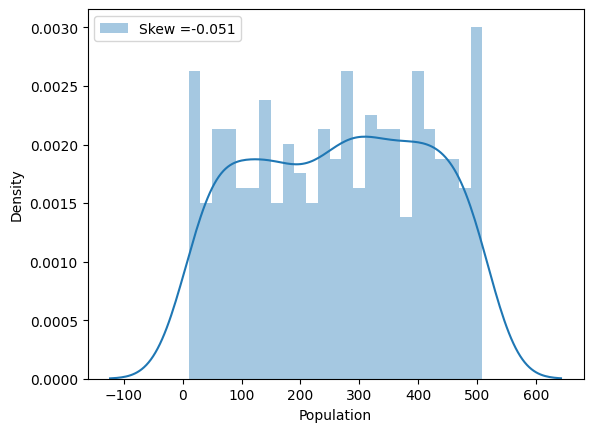

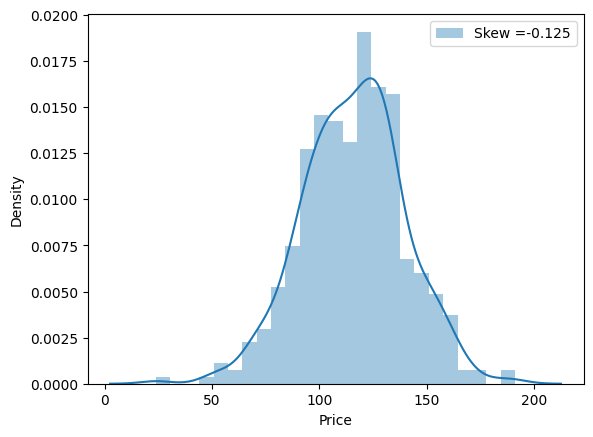

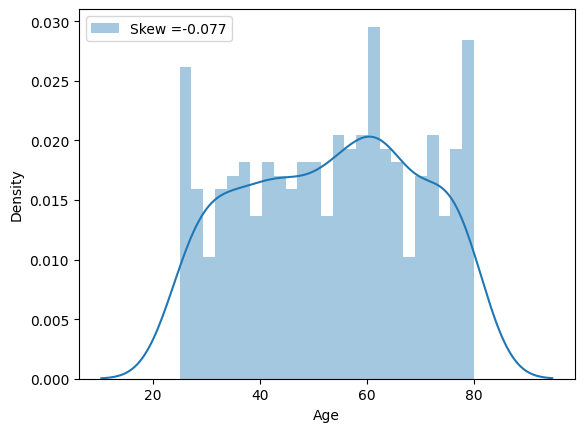

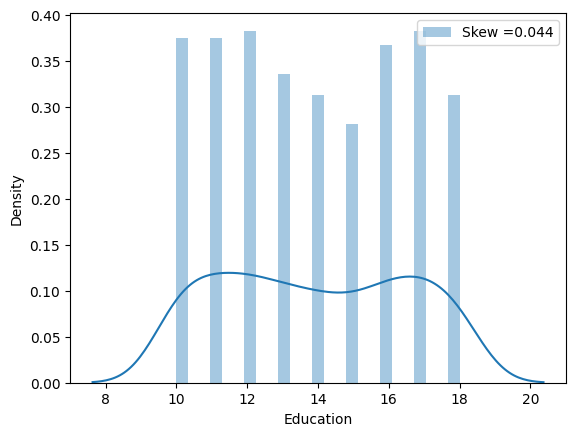

In [32]:
for i in num_features:
    skew=df[i].skew()
    sn.distplot(df[i],kde=True, label='Skew =%.3f'%(skew), bins=25)
    plt.legend(loc='best')
    plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


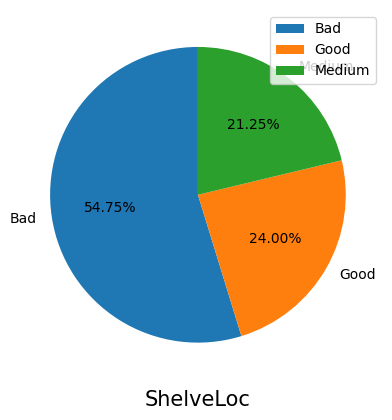

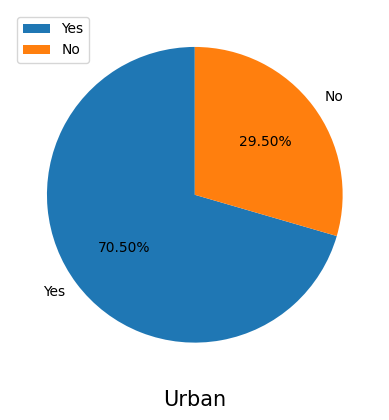

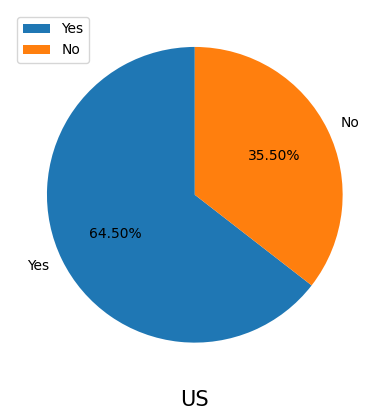

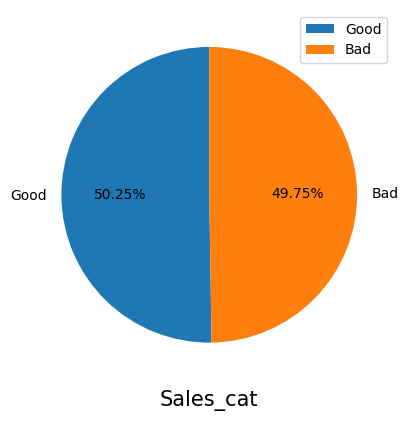

In [36]:
print(cat_features)
for i in cat_features:
    plt.pie(df[i].value_counts(),
           labels=df[i].unique(),autopct='%.2f%%',
           startangle=90)
    plt.xlabel(i,fontsize=15)
    plt.legend(loc='best')
    plt.show()

### Target category is well balanced.

## Multivariate analysis

<AxesSubplot: >

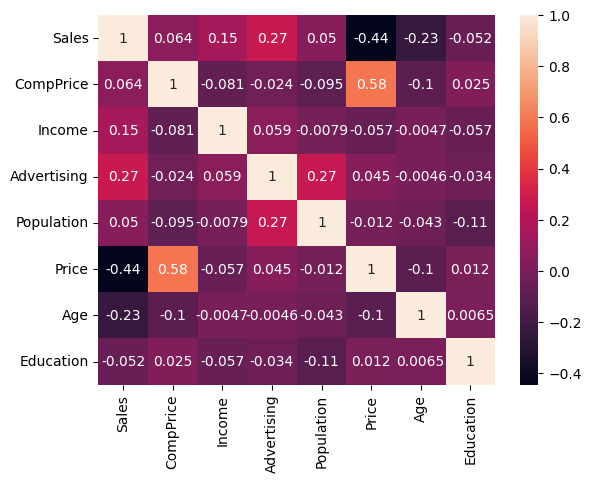

In [37]:
sn.heatmap(df.corr(),annot=True)

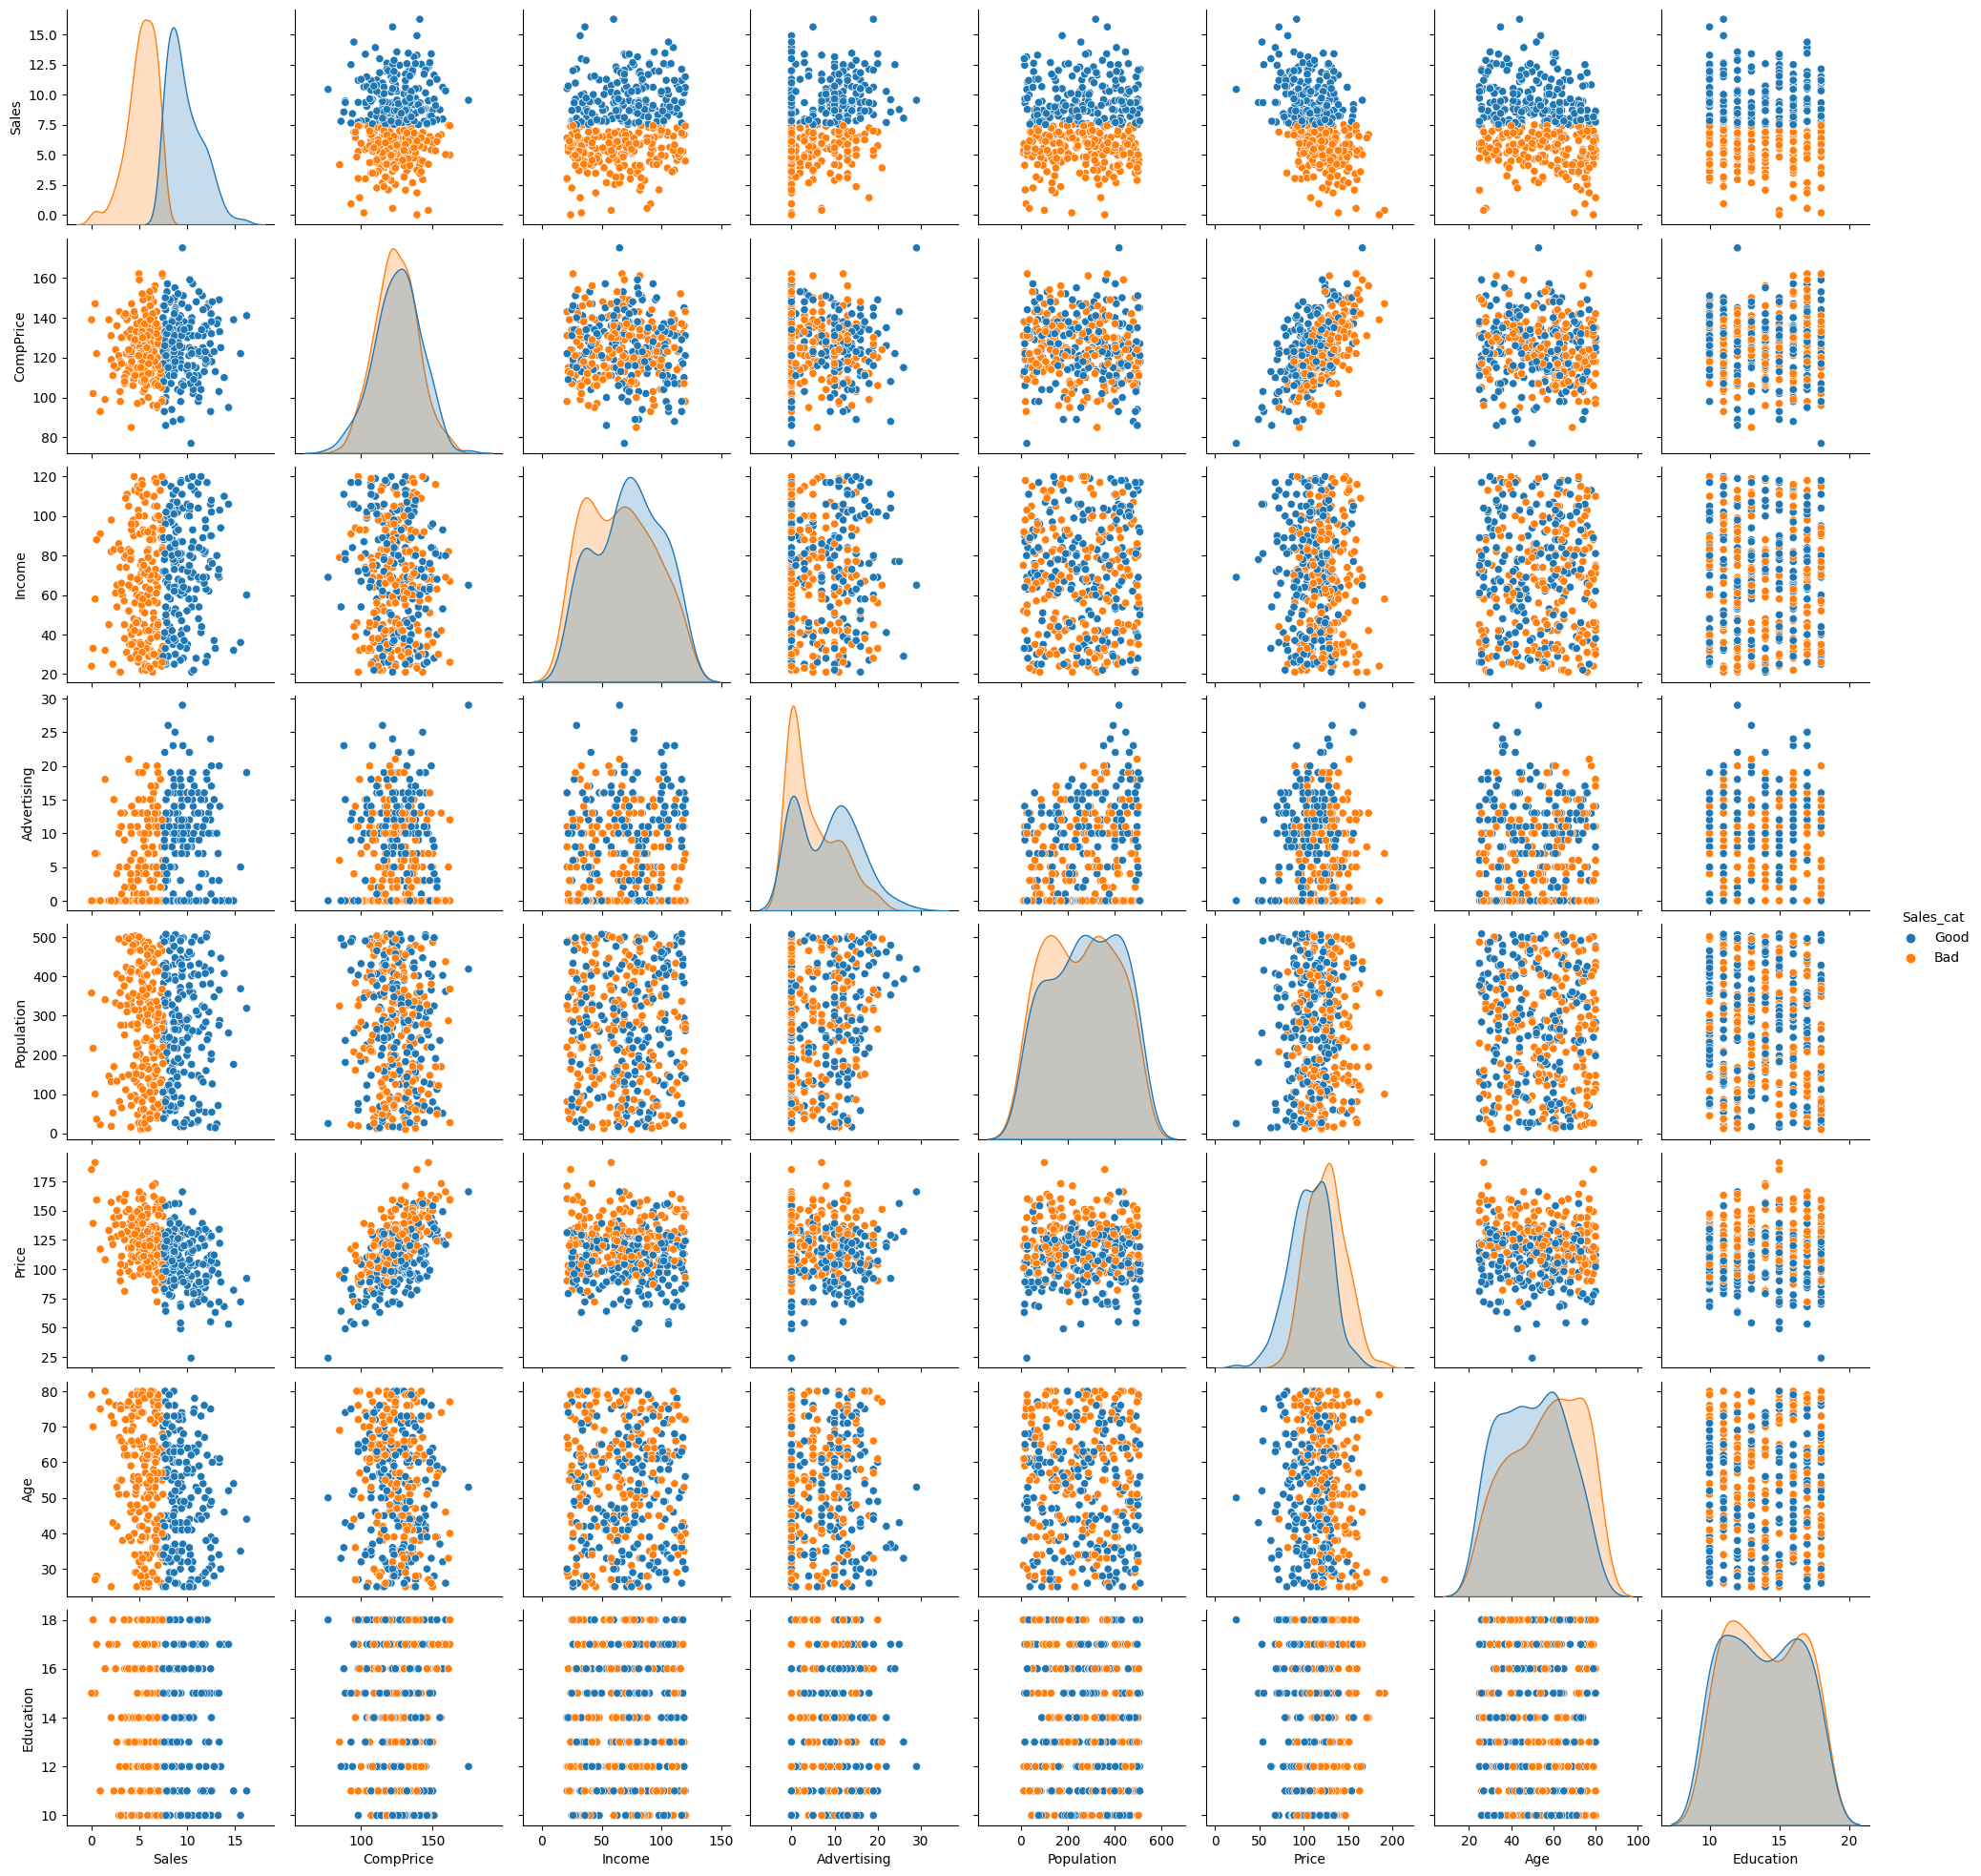

In [38]:
sn.pairplot(data=df,hue='Sales_cat')

<AxesSubplot: xlabel='Education'>

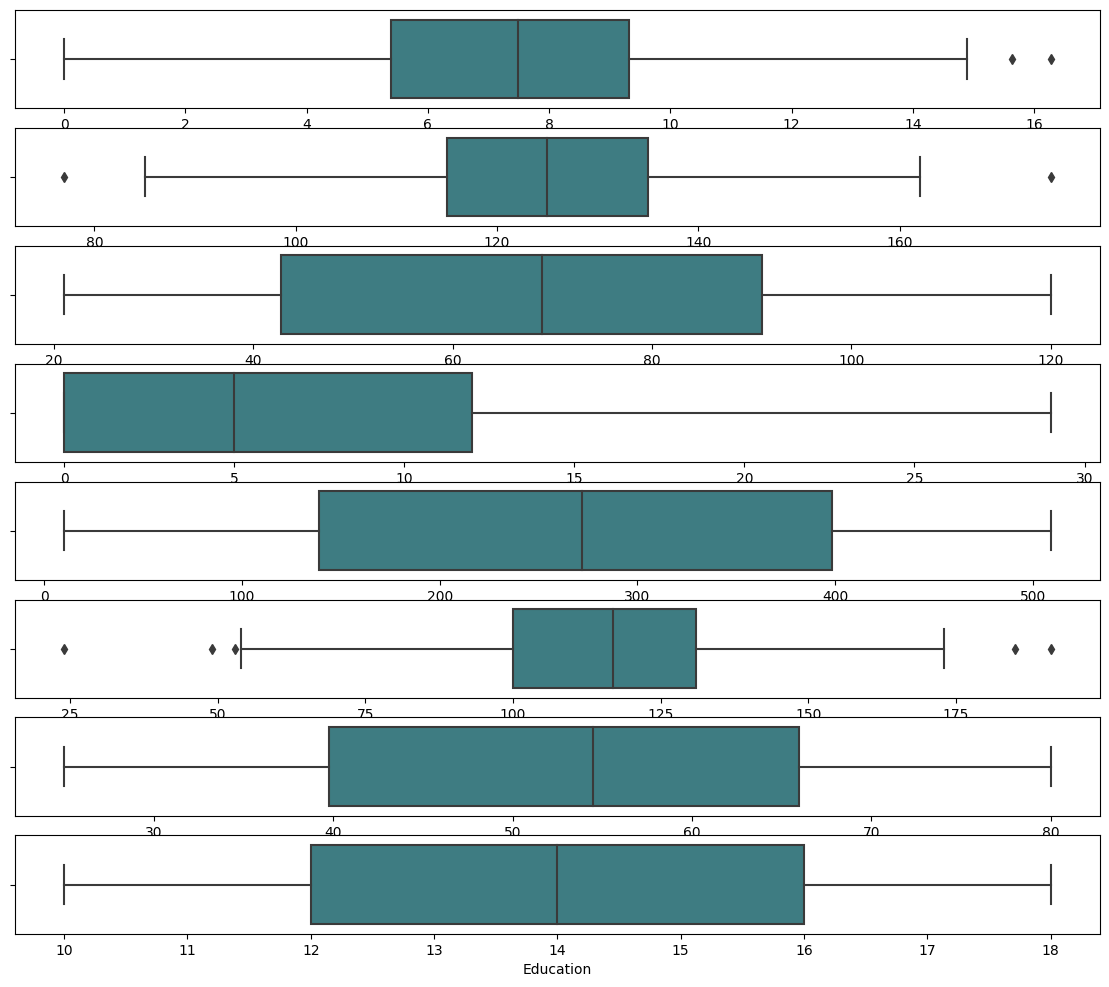

In [44]:
# Check for outlier

ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sn.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sn.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sn.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sn.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sn.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sn.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sn.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sn.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])

## Now we do the feature engineering

In [47]:
cat_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [48]:
df['US']=df['US'].apply(lambda x:1 if x=='YES' else 0 )
df['Urban']=df['Urban'].apply(lambda x:1 if x=='YES' else 0)
df['Sales_cat']=df['Sales_cat'].apply(lambda x:1 if x=='Good' else 0)
df['ShelveLoc']=df['ShelveLoc'].map({'Medium':1,'Good':2,'Bad':0})
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US  Sales_cat  
0           17      0   0          1  
1           10      0   0          1  
2           12      0   0          1  
3           14      0   0          0  
4           13      0   0          0  
..         ...    ...  ..        ...  
395         14      0   0          1  
396         11      0   0          0  
397         18      0   0          0  
398         12      0   0          0  
399         16      0   0          1  

[400 rows x 12 columns]

# Split the data into Features and Target

In [49]:
X=df.drop(columns=['Sales','Sales_cat'])
Y=df['Sales_cat']
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          1   59   
3          117     100            4         466     97          1   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          1   55   
397        162      26           12         368    159          1   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      0   0  
1           10      0   0  
2           12      0   0  
3           14      0   0  
4           13      0   0  
..         ...    ...  ..  
395         14      0   0  
396         11      0   0  
397         18      0   0  
398         12      0   0  
399         16      0   0  

[400 rows x 10 columns]

In [50]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_cat, Length: 400, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=42,shuffle=True)
x_train

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (300, 10)
x_test (100, 10)
y_train (300,)
y_test (100,)


# Random forest Classification

In [53]:
num_trees=100
max_features=6
n_split=10
r_state=42

# if n_splits are more then yhe score is lower
kfold=KFold(n_splits=n_split,shuffle=True,random_state=2)

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=r_state)
result_rfc=cross_val_score(model,x_train,y_train,cv=kfold)

print(result_rfc.mean()*100)


81.0


# Using various Ensemble Techniques

## Bagging

In [54]:
cart=DecisionTreeClassifier()

model1=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,
                         max_features=max_features,random_state=r_state)

results_bag=cross_val_score(model1,x_train,y_train,cv=kfold)
print('Bagging Score',results_bag.mean()*100)

78.33333333333334


## Boosting

In [55]:
# without using base estimator
model2=AdaBoostClassifier(n_estimators=num_trees,random_state=r_state)
result_boost=cross_val_score(model2,x_train,y_train,cv=kfold)
print('Boosting:',result_boost.mean()*100)

85.00000000000001


In [56]:
#Using base estimator
model21 = AdaBoostClassifier(base_estimator=cart,n_estimators=num_trees, random_state=r_state)
result_boost1=cross_val_score(model21,x_train,y_train,cv=kfold)
print(result_boost1.mean()*100)

74.0


So, here we can see w/o base estimator the accuracy is 11% more than with base_estimator.

## Stacking

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Create sub models

estimator=[]

model3=LogisticRegression(max_iter=500)
estimator.append(('Logitic', model3))

model4=DecisionTreeClassifier()
estimator.append(('Cart',model4))

model5=SVC()
estimator.append(('SVM',model5))

#Create the ensemble model
ensemble=VotingClassifier(estimator)
result_stack=cross_val_score(ensemble,x_train,y_train,cv=kfold)
print(estimator)
print('Stacking :',result_stack.mean()*100)

[('Logitic', LogisticRegression(max_iter=500)), ('Cart', DecisionTreeClassifier()), ('SVM', SVC())]
Stacking : 82.33333333333333


## So we see that the high accuracy is given by a stacking and Boosting.

- Here, we can use the stacking accuracy,because it uses multple model and give the avg accuracy.

In [58]:
ensemble.fit(x_train,y_train)
ens_pred=ensemble.predict(x_test)
ens_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [59]:
ens_actual_pred=pd.DataFrame({'Actaul':y_test,'Predict':ens_pred})
print(ens_actual_pred['Predict'].value_counts())
ens_actual_pred


1    50
0    50
Name: Predict, dtype: int64


Actaul  Predict
209       0        1
280       0        0
33        1        1
210       0        0
93        1        1
..      ...      ...
314       1        1
373       0        0
380       1        1
239       0        0
75        1        1

[100 rows x 2 columns]

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.82      0.79      0.80        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



<AxesSubplot: >

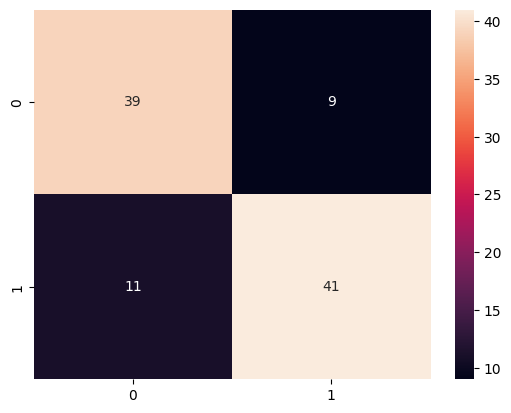

In [60]:
print(classification_report(y_test,ens_pred))
sn.heatmap(confusion_matrix(y_test,ens_pred),annot=True,fmt = "d")


# This Output is right because the target columns have equal variable(0,1)